 # AIR QUALITY 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

 # Load Dataset

In [2]:
df=pd.read_csv('Air Quality.csv')
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


 # PREPROCESSING

In [10]:
df.shape

(5000, 10)

In [11]:
df.isnull().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64

In [12]:
df.dtypes

Temperature                      float64
Humidity                         float64
PM2.5                            float64
PM10                             float64
NO2                              float64
SO2                              float64
CO                               float64
Proximity_to_Industrial_Areas    float64
Population_Density                 int64
Air Quality                       object
dtype: object

In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [14]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


 # EDA

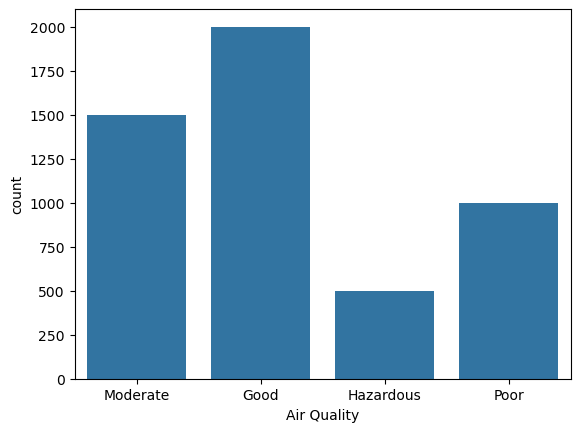

In [5]:
sns.countplot(data=df,x='Air Quality')
plt.show()

<Axes: >

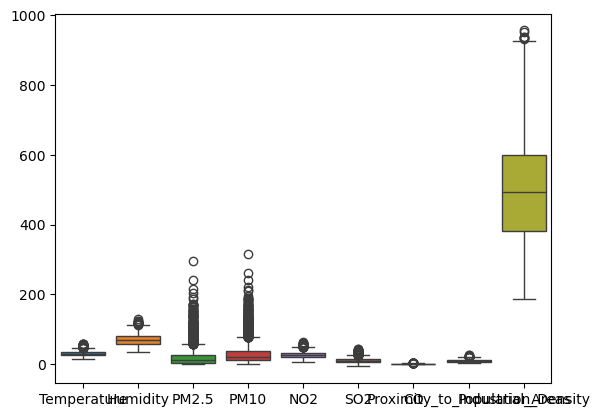

In [15]:
sns.boxplot(df)

Text(0.5, 1.0, 'Air Quality')

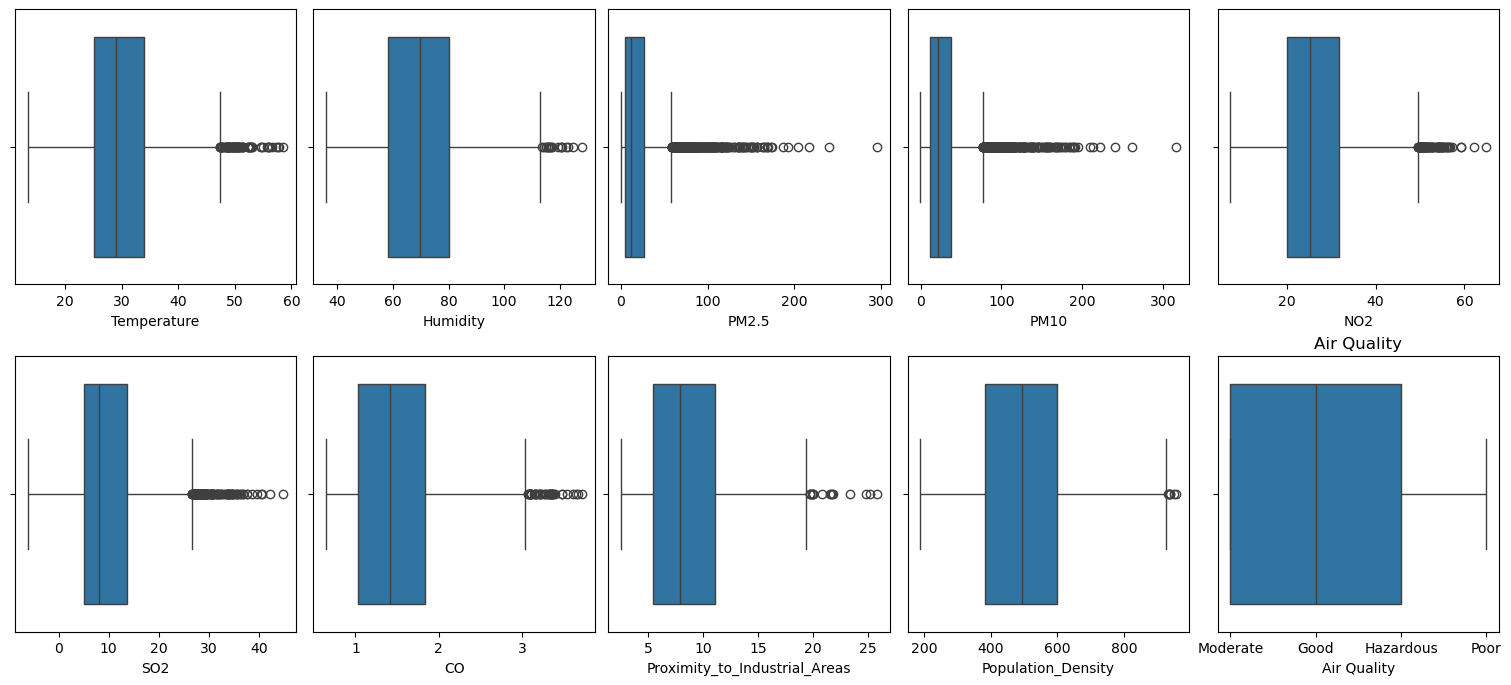

In [16]:
 col=['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO','Proximity_to_Industrial_Areas','Population_Density','Air Quality']

plt.figure(figsize=(15,15),layout='constrained')
 for i in range(len(col)):
       plt.subplot(5,5,i+1)
       sns.boxplot(data=df,x=col[i])
     
plt.title(col[i])

 # Label Encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df['Air Quality']=lb.fit_transform(df['Air Quality'])
df['Air Quality']

0       2
1       2
2       2
3       0
4       0
       ..
4995    1
4996    2
4997    2
4998    0
4999    2
Name: Air Quality, Length: 5000, dtype: int32

#  Data Splitting

In [11]:
x=df.iloc[:,:-1]
x

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303
...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241


In [13]:
y=df.iloc[:,-1]
y

0        Moderate
1        Moderate
2        Moderate
3            Good
4            Good
          ...    
4995    Hazardous
4996     Moderate
4997     Moderate
4998         Good
4999     Moderate
Name: Air Quality, Length: 5000, dtype: object

In [20]:
df.corr()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
Temperature,1.000000,0.466456,0.323840,0.425690,0.591969,0.568082,0.685258,-0.589564,0.481692,0.501446
Humidity,0.466456,1.000000,0.273366,0.359156,0.491977,0.459804,0.567540,-0.479646,0.411630,0.430633
PM2.5,0.323840,0.273366,1.000000,0.973005,0.333004,0.299582,0.395179,-0.315766,0.278957,0.268432
PM10,0.425690,0.359156,0.973005,1.000000,0.439916,0.401849,0.518895,-0.425018,0.365734,0.366493
NO2,0.591969,0.491977,0.333004,0.439916,1.000000,0.571839,0.710792,-0.607710,0.510938,0.521952
SO2,0.568082,0.459804,0.299582,0.401849,0.571839,1.000000,0.679060,-0.570385,0.475242,0.497263
CO,0.685258,0.567540,0.395179,0.518895,0.710792,0.679060,1.000000,-0.707581,0.593389,0.618933
Proximity_to_Industrial_Areas,-0.589564,-0.479646,-0.315766,-0.425018,-0.607710,-0.570385,-0.707581,1.000000,-0.498058,-0.715686
Population_Density,0.481692,0.411630,0.278957,0.365734,0.510938,0.475242,0.593389,-0.498058,1.000000,0.432361
Air Quality,0.501446,0.430633,0.268432,0.366493,0.521952,0.497263,0.618933,-0.715686,0.432361,1.000000


<Axes: >

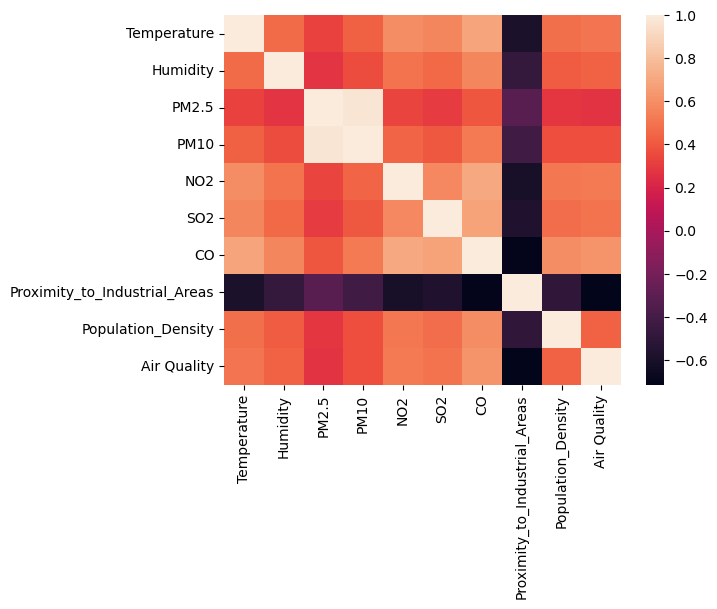

In [21]:
sns.heatmap(df.select_dtypes(['number']).corr())

In [22]:
df.drop(['Proximity_to_Industrial_Areas'],axis=1)

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,303,0
...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,241,0


In [23]:
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,2
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,2
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,2
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,2
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,2
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,0


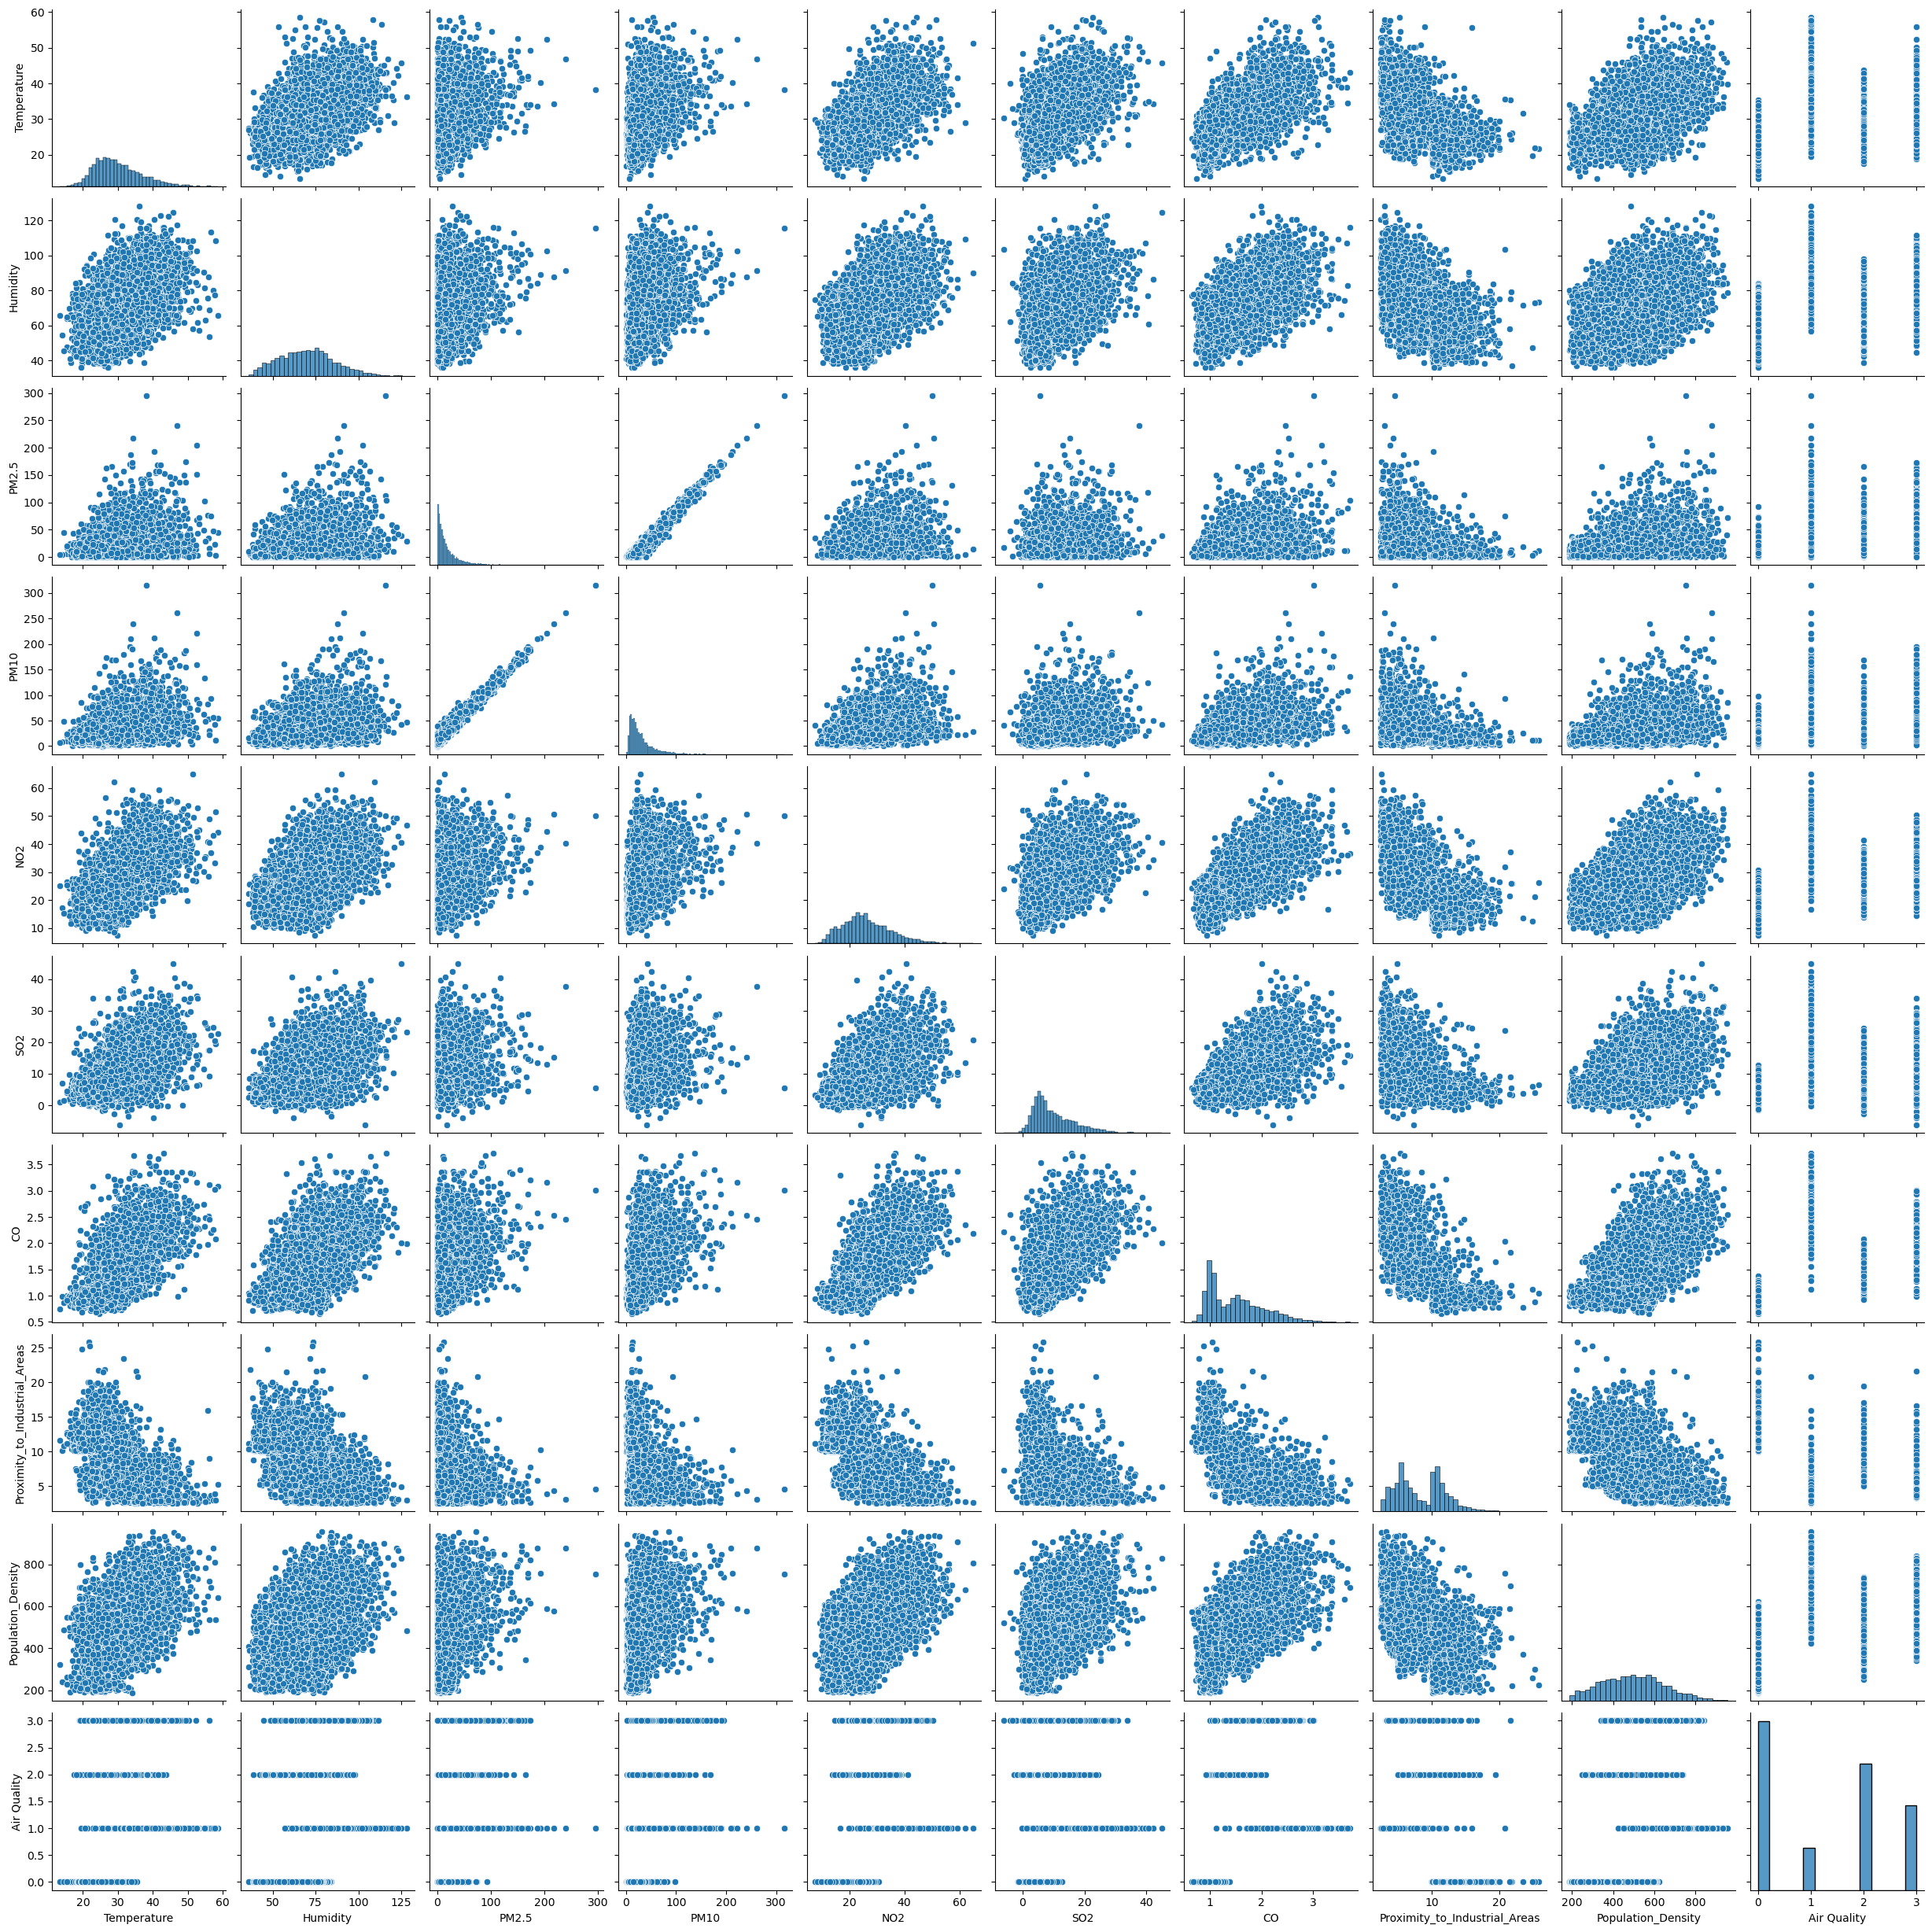

In [24]:
sns.pairplot(df)

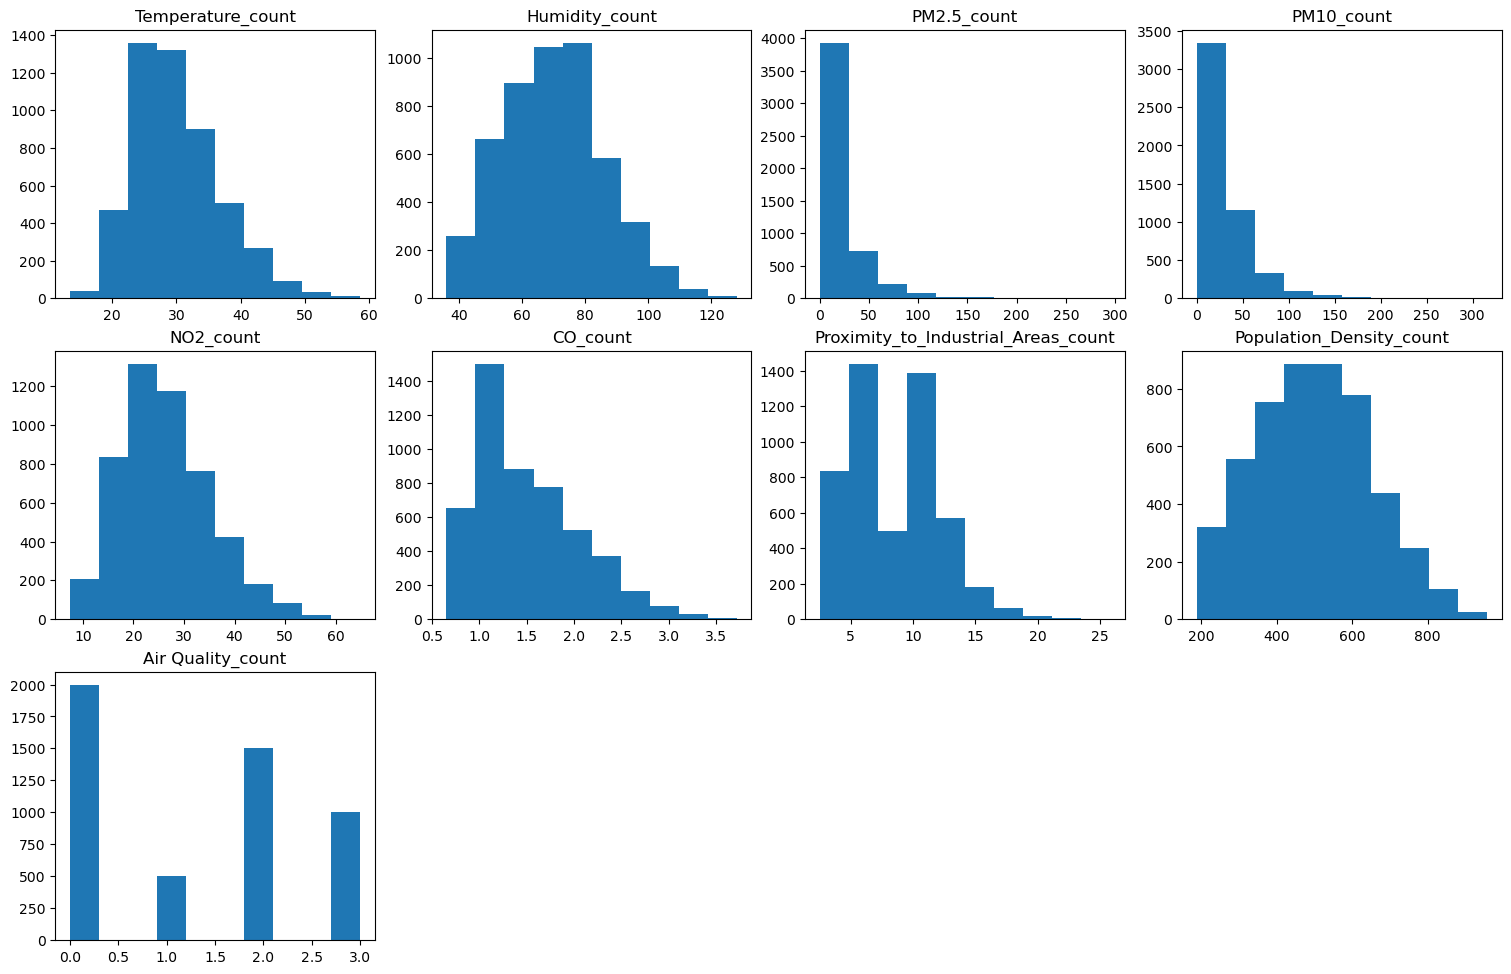

In [25]:
col_count=['Temperature','Humidity','PM2.5','PM10','NO2','CO','Proximity_to_Industrial_Areas','Population_Density','Air Quality']
plt.figure(figsize=(15,15),layout='constrained')
for i in range(len(col_count)):
    plt.subplot(5,4,i+1)
    plt.hist(data=df,x=col_count[i])
    plt.title(col_count[i]+'_count')
plt.show()

 # OUTLIER TREATING

<Axes: >

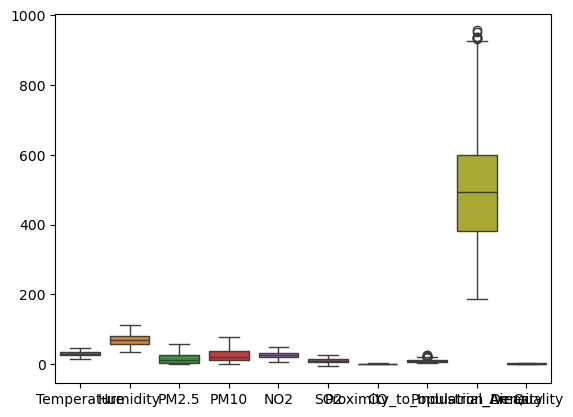

In [26]:
lst=['Temperature','Humidity','PM2.5','PM10','NO2','SO2','CO']
for i in lst:
  Q1=df[i].quantile(0.25)
  Q3=df[i].quantile(0.75)
  IQR=Q3-Q1
  lower_limit=Q1-1.5*IQR
  upper_limit=Q3+1.5*IQR
  df.loc[(df[i]>=upper_limit),i]=upper_limit
  df.loc[(df[i]<=lower_limit),i]=lower_limit
sns.boxplot(df)

 # Train Test Split

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

 # KNN

Test accuracy: 0.7893333333333333
train accuracy: 0.8931428571428571
CR:               precision    recall  f1-score   support

           0       0.89      0.95      0.92       611
           1       0.71      0.56      0.63       154
           2       0.76      0.76      0.76       466
           3       0.62      0.59      0.60       269

    accuracy                           0.79      1500
   macro avg       0.75      0.72      0.73      1500
weighted avg       0.78      0.79      0.78      1500



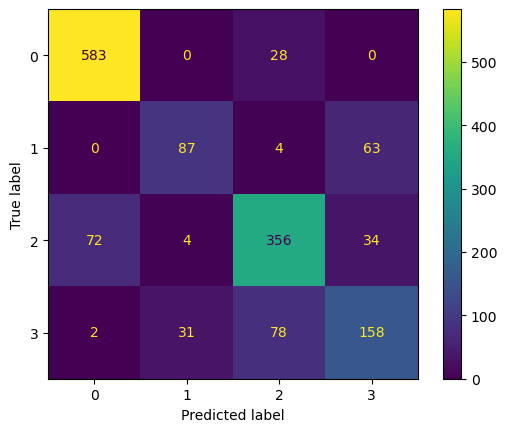

In [28]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
kc=accuracy_score(y_test,y_pred)*100

 # Logistic Regression

Test accuracy: 0.78
train accuracy: 0.7691428571428571
CR:               precision    recall  f1-score   support

           0       0.89      0.95      0.92       611
           1       0.71      0.56      0.63       154
           2       0.76      0.76      0.76       466
           3       0.62      0.59      0.60       269

    accuracy                           0.79      1500
   macro avg       0.75      0.72      0.73      1500
weighted avg       0.78      0.79      0.78      1500



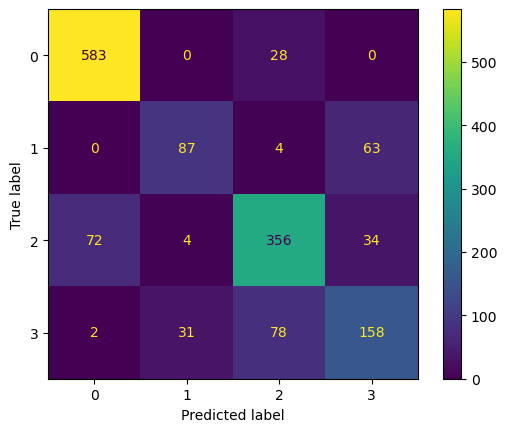

In [29]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
lra=accuracy_score(y_test,y_pred)*100

# Naive Bayes

Test accuracy: 0.9266666666666666
train accuracy: 0.9217142857142857
CR:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       611
           1       0.86      0.82      0.84       154
           2       0.94      0.92      0.93       466
           3       0.79      0.84      0.82       269

    accuracy                           0.93      1500
   macro avg       0.90      0.89      0.90      1500
weighted avg       0.93      0.93      0.93      1500



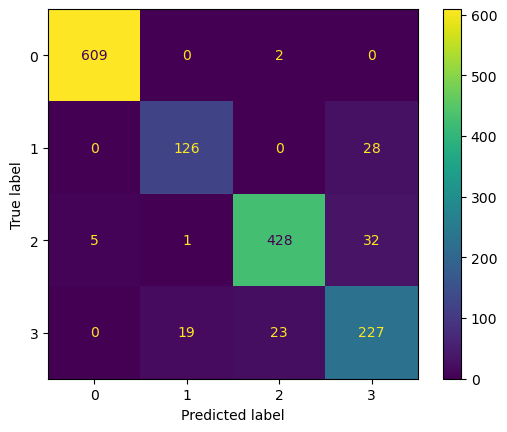

In [30]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_preds=gb.predict(x_test)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
nb=accuracy_score(y_test,y_preds)*100

 # Random Forest

Test accuracy: 0.9293333333333333
train accuracy: 0.9911428571428571
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       0.84      0.77      0.80       154
           2       0.96      0.94      0.95       466
           3       0.79      0.85      0.82       269

    accuracy                           0.93      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.93      0.93      0.93      1500



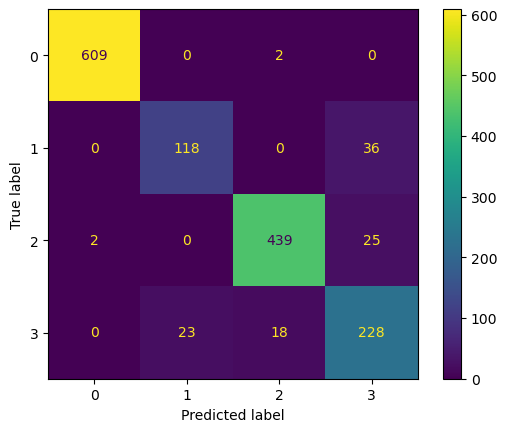

In [32]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
rfa=accuracy_score(y_test,y_pred)*100

 # AdaBoost

Test accuracy: 0.7133333333333334
train accuracy: 0.6885714285714286
CR:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       611
           1       0.00      0.00      0.00       154
           2       0.52      0.99      0.68       466
           3       0.00      0.00      0.00       269

    accuracy                           0.71      1500
   macro avg       0.38      0.50      0.42      1500
weighted avg       0.57      0.71      0.62      1500



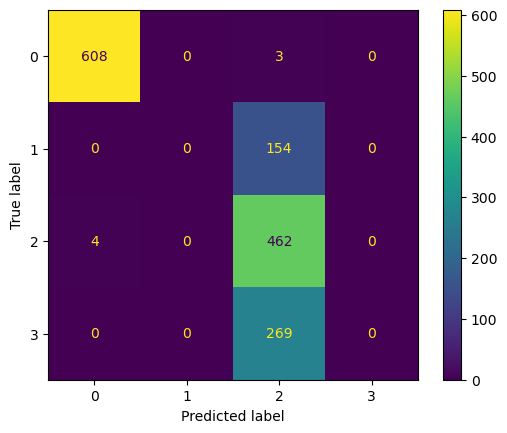

In [33]:
adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
ac=accuracy_score(y_test,y_pred)*100

# Gradient Boosting

Test accuracy: 0.95
train accuracy: 0.9782857142857143
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       0.91      0.81      0.85       154
           2       0.96      0.97      0.97       466
           3       0.85      0.89      0.87       269

    accuracy                           0.95      1500
   macro avg       0.93      0.92      0.92      1500
weighted avg       0.95      0.95      0.95      1500



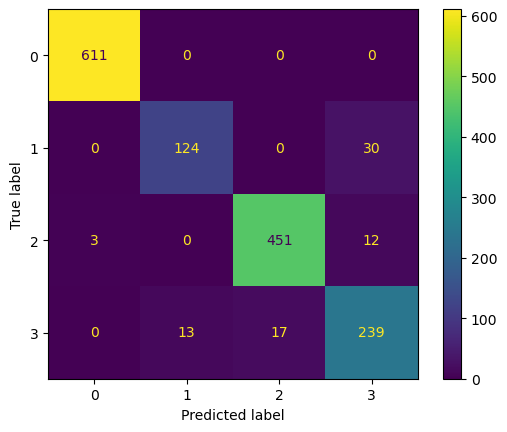

In [34]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
gbca=accuracy_score(y_test,y_preds)*100

# Decision Tree

Test accuracy: 0.9186666666666666
train accuracy: 1.0
CR:               precision    recall  f1-score   support

        Good       0.99      1.00      0.99       611
   Hazardous       0.83      0.74      0.78       154
    Moderate       0.94      0.93      0.94       466
        Poor       0.76      0.83      0.80       269

    accuracy                           0.92      1500
   macro avg       0.88      0.87      0.88      1500
weighted avg       0.92      0.92      0.92      1500



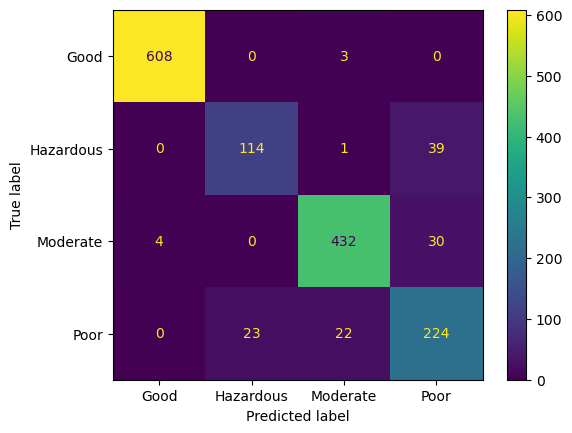

In [17]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_predd=dt.predict(x_test)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predd))
print('CR:',classification_report(y_test,y_predd))
dta=accuracy_score(y_test,y_predd)*100

# INTIAL PERFORMANCE

In [36]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt'])
tb['accuracy']=pd.Series([kc,lra,nb,rfa,ac,gbca,dta])
tb

,model,accuracy
0,knn,78.933333
1,lr,78.933333
2,gb,92.666667
3,rf,92.933333
4,adaboost,71.333333
5,gbc,95.000000
6,dt,91.800000


In [37]:
df.value_counts('Air Quality')

Air Quality
0    2000
2    1500
3    1000
1     500
Name: count, dtype: int64

# OVER SAMPLING

In [ ]:
from imblearn.over_sampling import SMOTE
over=SMOTE(random_state=5)
x_ov,y_ov=over.fit_resample(x,y)
y_ov.value_counts()

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_ov,y_ov,test_size=0.3,random_state=2)

Test accuracy: 0.8829166666666667
train accuracy: 0.9530357142857143
CR:               precision    recall  f1-score   support

           0       0.91      0.95      0.93       611
           1       0.92      0.95      0.94       584
           2       0.84      0.80      0.82       608
           3       0.85      0.83      0.84       597

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



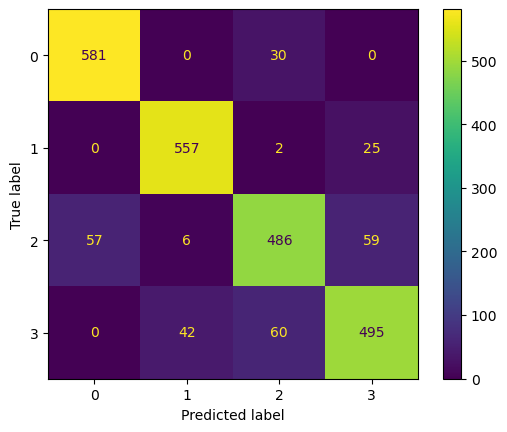

In [40]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
koc=accuracy_score(y_test,y_pred)*100

Test accuracy: 0.7
train accuracy: 0.7008928571428571
CR:               precision    recall  f1-score   support

           0       0.91      0.95      0.93       611
           1       0.92      0.95      0.94       584
           2       0.84      0.80      0.82       608
           3       0.85      0.83      0.84       597

    accuracy                           0.88      2400
   macro avg       0.88      0.88      0.88      2400
weighted avg       0.88      0.88      0.88      2400



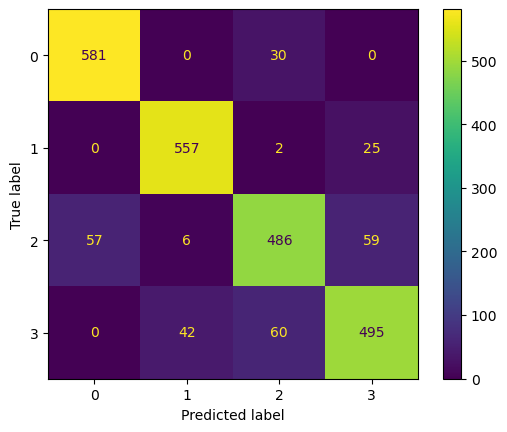

In [41]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
lro=accuracy_score(y_test,y_pred)*100

Test accuracy: 0.9066666666666666
train accuracy: 0.9123214285714286
CR:               precision    recall  f1-score   support

           0       0.99      0.99      0.99       611
           1       0.89      0.86      0.88       584
           2       0.95      0.91      0.93       608
           3       0.81      0.86      0.83       597

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



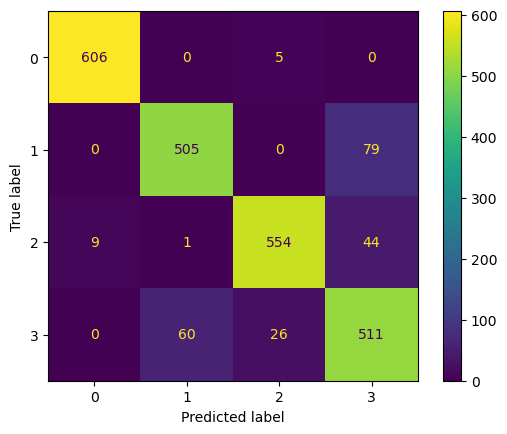

In [42]:
gb=GaussianNB()
gb.fit(x_train,y_train)
y_preds=gb.predict(x_test)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
nbo=accuracy_score(y_test,y_preds)*100

Test accuracy: 0.9466666666666667
train accuracy: 0.9939285714285714
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       0.95      0.92      0.93       584
           2       0.96      0.95      0.96       608
           3       0.88      0.91      0.90       597

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400



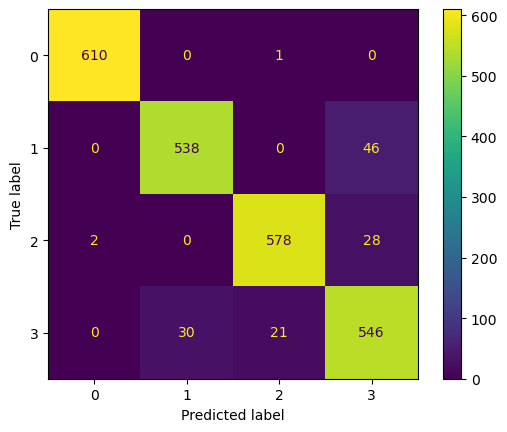

In [43]:
rf=RandomForestClassifier(n_estimators=5,random_state=10)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
rfo=accuracy_score(y_test,y_pred)*100

Test accuracy: 0.6504166666666666
train accuracy: 0.6403571428571428
CR:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       611
           1       0.00      0.00      0.00       584
           2       0.70      0.97      0.81       608
           3       0.39      0.61      0.47       597

    accuracy                           0.65      2400
   macro avg       0.52      0.64      0.57      2400
weighted avg       0.53      0.65      0.58      2400



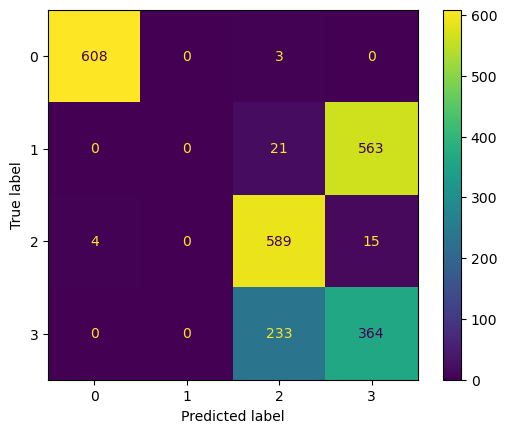

In [44]:

adaboost=AdaBoostClassifier(n_estimators=10,estimator=None,learning_rate=0.2,random_state=5)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
ao=accuracy_score(y_test,y_pred)*100

Test accuracy: 0.9379166666666666
train accuracy: 0.9657142857142857
CR:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       611
           1       0.92      0.92      0.92       584
           2       0.96      0.94      0.95       608
           3       0.87      0.89      0.88       597

    accuracy                           0.94      2400
   macro avg       0.94      0.94      0.94      2400
weighted avg       0.94      0.94      0.94      2400



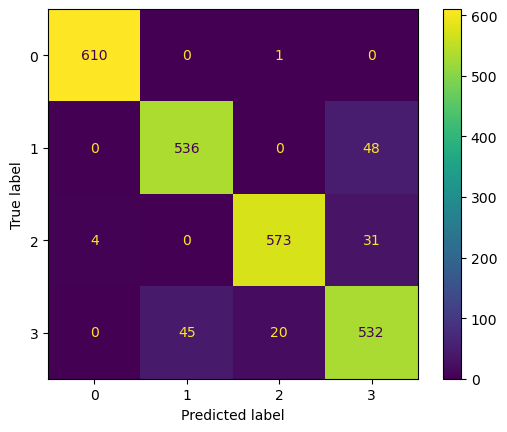

In [45]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.05,random_state=200)
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
gbco=accuracy_score(y_test,y_preds)*100

Test accuracy: 0.9186666666666666
train accuracy: 1.0
CR:               precision    recall  f1-score   support

        Good       0.99      0.99      0.99       611
   Hazardous       0.82      0.73      0.78       154
    Moderate       0.94      0.94      0.94       466
        Poor       0.77      0.82      0.80       269

    accuracy                           0.92      1500
   macro avg       0.88      0.87      0.88      1500
weighted avg       0.92      0.92      0.92      1500



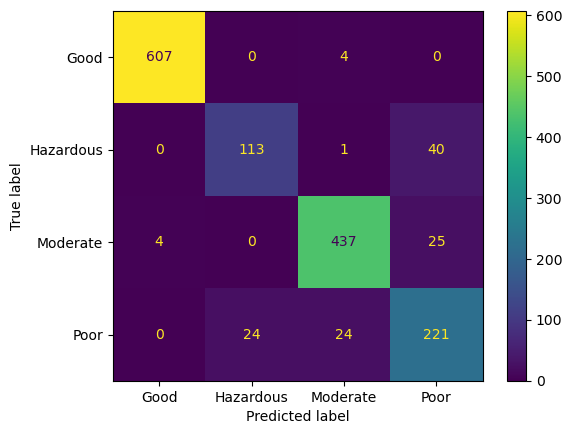

In [19]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(x_train,y_train)
y_predd=dt.predict(x_test)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predd))
print('CR:',classification_report(y_test,y_predd))
dto=accuracy_score(y_test,y_predd)*100

# Performance after OverSampling

In [47]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt'])
tb['accuracy']=pd.Series([kc,lra,nb,rfa,ac,gbca,dta])
tb['Accuracy_oversampling']=pd.Series([koc,lro,nbo,rfo,ao,gbco,dto])
tb

,model,accuracy,Accuracy_oversampling
0,knn,78.933333,88.291667
1,lr,78.933333,88.291667
2,gb,92.666667,90.666667
3,rf,92.933333,94.666667
4,adaboost,71.333333,65.041667
5,gbc,95.000000,93.791667
6,dt,91.800000,93.083333


# HyperParameter Tuning

In [48]:
par={'n_neighbors':[3,5,27,59,11],'weights':['uniform','distance'],'algorithm':['auto','ball_tree','kd_tree']}
knt=GridSearchCV(knn,par,cv=10,scoring='accuracy')
knt.fit(x_train,y_train)
print(knt.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}


Test accuracy: 0.90125
train accuracy: 1.0
CR:               precision    recall  f1-score   support

           0       0.92      0.95      0.94       611
           1       0.94      0.97      0.95       584
           2       0.86      0.82      0.84       608
           3       0.88      0.87      0.87       597

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



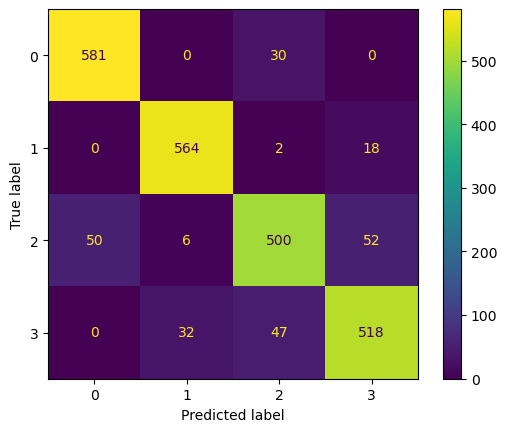

In [49]:
knn=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance')
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print('Test accuracy:',knn.score(x_test,y_test))
print('train accuracy:',knn.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
knt=accuracy_score(y_test,y_pred)*100
y_tpred=knn.predict(x_train)
kntt=accuracy_score(y_tpred,y_train)*100

In [50]:
par={'C':[0.1,1,10,100],'penalty':['l1','l2'],'solver':['liblinear','lbfgs','saga']}
lrt=GridSearchCV(lr,par,cv=10,scoring='accuracy')
lrt.fit(x_train,y_train)
print(lrt.best_params_)

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


Test accuracy: 0.8645833333333334
train accuracy: 0.87375
CR:               precision    recall  f1-score   support

           0       0.92      0.95      0.94       611
           1       0.94      0.97      0.95       584
           2       0.86      0.82      0.84       608
           3       0.88      0.87      0.87       597

    accuracy                           0.90      2400
   macro avg       0.90      0.90      0.90      2400
weighted avg       0.90      0.90      0.90      2400



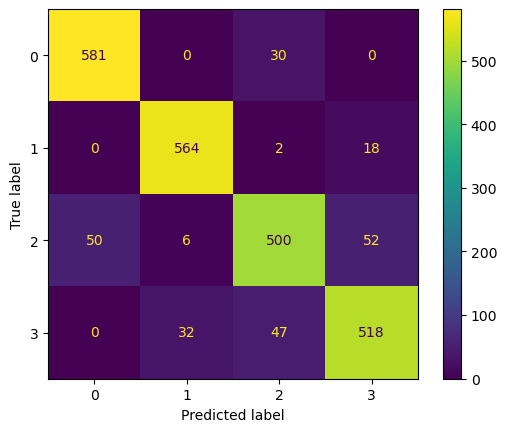

In [51]:
lr=LogisticRegression(C=1,penalty='l1',solver='liblinear')
lr.fit(x_train,y_train)
print('Test accuracy:',lr.score(x_test,y_test))
print('train accuracy:',lr.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
lrt=accuracy_score(y_test,y_pred)*100
y_tpred1=lr.predict(x_train)
lrtt=accuracy_score(y_tpred1,y_train)*100

In [52]:
par={'var_smoothing':[1e-9,1e-8,1e-7]}
nbt=GridSearchCV(gb,par,cv=10,scoring='accuracy')
nbt.fit(x_train,y_train)
print(nbt.best_params_)

{'var_smoothing': 1e-07}


Test accuracy: 0.9066666666666666
train accuracy: 0.9121428571428571
CR:               precision    recall  f1-score   support

           0       0.98      0.99      0.99       611
           1       0.89      0.86      0.88       584
           2       0.95      0.91      0.93       608
           3       0.81      0.86      0.83       597

    accuracy                           0.91      2400
   macro avg       0.91      0.91      0.91      2400
weighted avg       0.91      0.91      0.91      2400



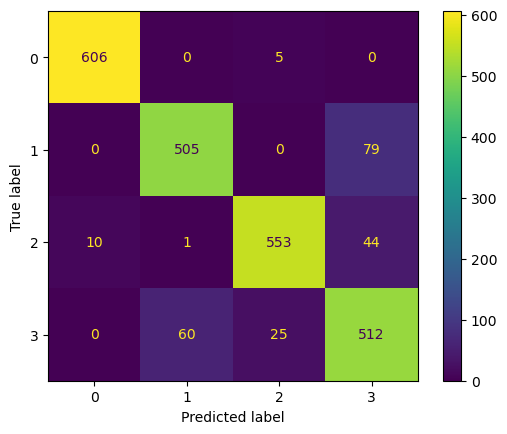

In [53]:
gb=GaussianNB(var_smoothing=1e-07)
gb.fit(x_train,y_train)
y_preds=gb.predict(x_test)
print('Test accuracy:',gb.score(x_test,y_test))
print('train accuracy:',gb.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
nbt=accuracy_score(y_test,y_preds)*100
y_tpred2=gb.predict(x_train)
nbtt=accuracy_score(y_tpred2,y_train)*100

In [54]:
par={'max_depth':['None',10,20,30],'max_features':['auto','sqrt','log2']}
rft=GridSearchCV(rf,par,cv=10,scoring='accuracy')
rft.fit(x_train,y_train)
print(rft.best_params_)

{'max_depth': 30, 'max_features': 'sqrt'}


Test accuracy: 0.9508333333333333
train accuracy: 0.9832142857142857
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       0.94      0.93      0.93       584
           2       0.98      0.95      0.97       608
           3       0.89      0.92      0.90       597

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400



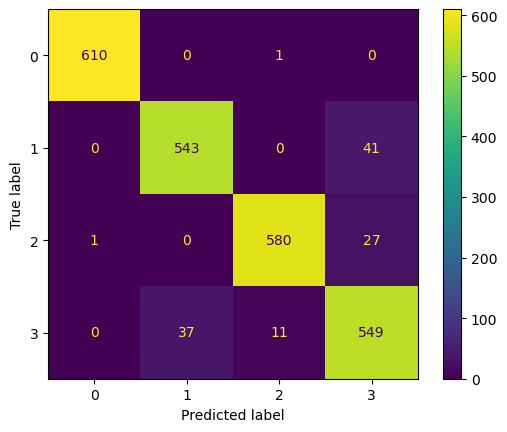

In [55]:
rf=RandomForestClassifier(max_depth=10,max_features='sqrt')
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('Test accuracy:',rf.score(x_test,y_test))
print('train accuracy:',rf.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
rft=accuracy_score(y_test,y_pred)*100
y_tpred3=rf.predict(x_train)
rftt=accuracy_score(y_tpred3,y_train)*100


In [56]:
par={'n_estimators':[50,100,150],'learning_rate':[0.01,0.1,1.0]}
adt=GridSearchCV(adaboost,par,cv=10,scoring='accuracy')
adt.fit(x_train,y_train)
print(adt.best_params_)

{'learning_rate': 1.0, 'n_estimators': 50}


Test accuracy: 0.5508333333333333
train accuracy: 0.5407142857142857
CR:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       611
           1       0.00      0.00      0.00       584
           2       0.50      1.00      0.67       608
           3       0.18      0.18      0.18       597

    accuracy                           0.55      2400
   macro avg       0.42      0.54      0.46      2400
weighted avg       0.43      0.55      0.47      2400



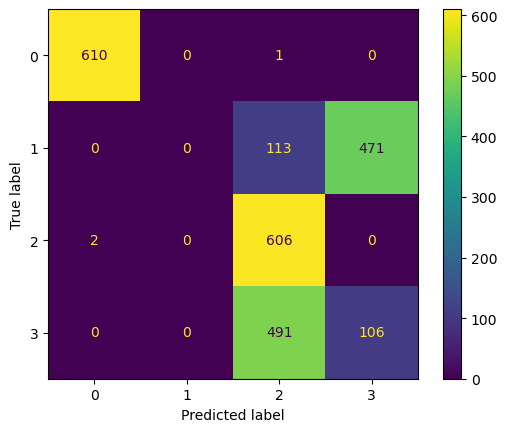

In [57]:
adaboost=AdaBoostClassifier(n_estimators=50,learning_rate=0.1)
adaboost.fit(x_train,y_train)
y_pred=adaboost.predict(x_test)
print('Test accuracy:',adaboost.score(x_test,y_test))
print('train accuracy:',adaboost.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
print('CR:',classification_report(y_test,y_pred))
adt=accuracy_score(y_test,y_pred)*100
y_tpred4=adaboost.predict(x_train)
adtt=accuracy_score(y_tpred4,y_train)*100

In [117]:
par={'n_estimators':[100,200],'max_depth':[3,4,5]}
gbt=GridSearchCV(gbc,par,cv=10,scoring='accuracy')
gbt.fit(x_train,y_train)
print(gbt.best_params_)


{'max_depth': 5, 'n_estimators': 200}


Test accuracy: 0.9504166666666667
train accuracy: 0.9964285714285714
CR:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       611
           1       0.94      0.94      0.94       584
           2       0.97      0.96      0.96       608
           3       0.90      0.91      0.90       597

    accuracy                           0.95      2400
   macro avg       0.95      0.95      0.95      2400
weighted avg       0.95      0.95      0.95      2400



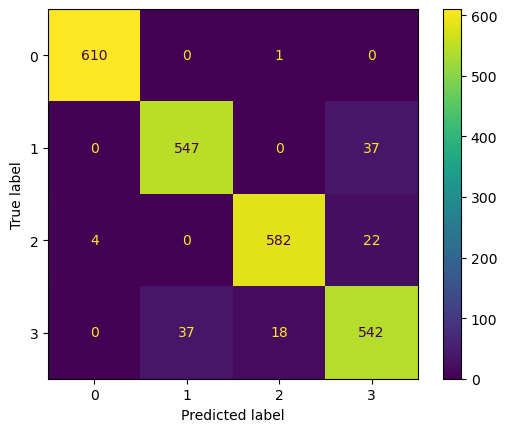

In [118]:
gbc=GradientBoostingClassifier(n_estimators=200,max_depth=3)
gbc.fit(x_train,y_train)
y_preds=gbc.predict(x_test)
print('Test accuracy:',gbc.score(x_test,y_test))
print('train accuracy:',gbc.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_preds))
print('CR:',classification_report(y_test,y_preds))
gbt=accuracy_score(y_test,y_preds)*100
y_tpred4=gbc.predict(x_train)
gbtt=accuracy_score(y_tpred4,y_train)*100

In [21]:
par={'max_depth':[3,5,10],'criterion':['gini','entropy']}
dtt=GridSearchCV(dt,par,cv=10,scoring='accuracy')
dtt.fit(x_train,y_train)
print(dtt.best_params_)

{'criterion': 'entropy', 'max_depth': 10}


Test accuracy: 0.9273333333333333
train accuracy: 0.9665714285714285
CR:               precision    recall  f1-score   support

        Good       1.00      1.00      1.00       611
   Hazardous       0.88      0.77      0.82       154
    Moderate       0.96      0.92      0.94       466
        Poor       0.77      0.87      0.81       269

    accuracy                           0.93      1500
   macro avg       0.90      0.89      0.89      1500
weighted avg       0.93      0.93      0.93      1500



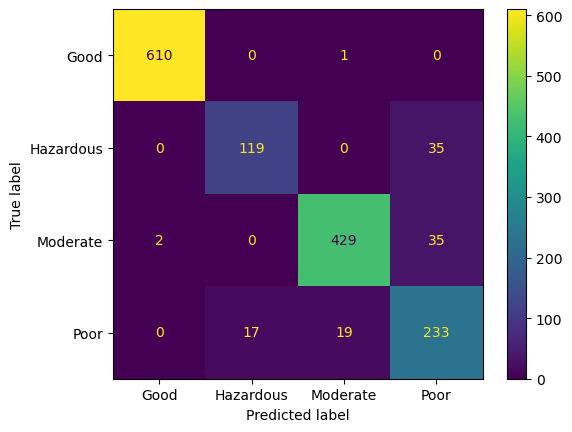

In [23]:
dt=DecisionTreeClassifier(criterion='gini',max_depth=10)
dt.fit(x_train,y_train)
y_predd=dt.predict(x_test)
print('Test accuracy:',dt.score(x_test,y_test))
print('train accuracy:',dt.score(x_train,y_train))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_predd))
print('CR:',classification_report(y_test,y_predd))
dtt=accuracy_score(y_test,y_predd)*100
y_tpred5=dt.predict(x_train)
dtt=accuracy_score(y_tpred5,y_train)*100

# Initial Accuracy and Accuracy After HyperParameter Tuning

In [121]:
tb=pd.DataFrame()
tb['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt'])
tb['accuracy']=pd.Series([kc,lra,nb,rfa,ac,gbca,dta])
tb['Accuracy_hyperparameter']=pd.Series([knt,lrt,nbt,rft,adt,gbt,dtt])
tb

,model,accuracy,Accuracy_hyperparameter
0,knn,78.933333,90.125000
1,lr,78.933333,90.125000
2,gb,92.666667,90.666667
3,rf,92.933333,95.083333
4,adaboost,71.333333,55.083333
5,gbc,95.000000,95.041667
6,dt,91.800000,96.375000


# TEST AND TRAIN ACCURACY

In [122]:
tb1=pd.DataFrame()
tb1['model']=pd.Series(['knn','lr','gb','rf','adaboost','gbc','dt'])
tb1['Test Accuracy']=pd.Series([kntt,lrtt,nbtt,rftt,adtt,gbtt,dtt])
tb1['Train Accuracy']=pd.Series([knt,lrt,nbt,rft,adt,gbt,dtt])
tb1



,model,Test Accuracy,Train Accuracy
0,knn,100.000000,90.125000
1,lr,87.375000,90.125000
2,gb,91.214286,90.666667
3,rf,98.321429,95.083333
4,adaboost,54.071429,55.083333
5,gbc,99.642857,95.041667
6,dt,96.375000,96.375000


In [123]:
import joblib
joblib.dump(dt,'model.pkl')
joblib.dump(lb,'label.pkl')


['label.pkl']

In [29]:
import numpy as np 
ab=[[27.1,	39.1,	6.1,	6.3,	13.5,	5.3,	1.15, 11.1	,551]]
dt.predict(ab)

array(['Good'], dtype=object)